#### Objective:
Predicting who will respond to an offer for a product or service

#### Variables and data types:
- Target:
<font color='red'>Response</font>
<br>*description: 1 if customer accepted the offer in the last campaign, 0 otherwise*
<br>
- Potential features:
1. **Nominal Categorical Variables**
<br>&emsp;&nbsp;<font color='blue'>AcceptedCmp1</font>
    *1 if customer accepted the offer in the 1st campaign, 0 otherwise*
<br>&emsp;&nbsp;<font color='blue'>AcceptedCmp2</font>
    *1 if customer accepted the offer in the 2nd campaign, 0 otherwise*
<br>&emsp;&nbsp;<font color='blue'>AcceptedCmp3</font>
    *1 if customer accepted the offer in the 3rd campaign, 0 otherwise*
<br>&emsp;&nbsp;<font color='blue'>AcceptedCmp4</font>
    *1 if customer accepted the offer in the 4th campaign, 0 otherwise*
<br>&emsp;&nbsp;<font color='blue'>AcceptedCmp5</font>
    *1 if customer accepted the offer in the 5th campaign, 0 otherwise*
<br>&emsp;&nbsp;<font color='blue'>Complain</font>
    *1 if customer complained in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>Marital</font>
    *customer’s marital status*

2. **Ordinal Categorical Variables**
<br>&emsp;&nbsp;<font color='blue'>Education</font>
    *customer’s level of education*


3. **Numerical Variables**
<br>&emsp;&nbsp;<font color='blue'>Year_Birth</font>
    *year of birth*
<br>&emsp;&nbsp;<font color='blue'>DtCustomer</font>
    *date of customer’s enrollment with the company*
<br>&emsp;&nbsp;<font color='blue'>Kidhome</font>
    *number of small children in customer’s household*
<br>&emsp;&nbsp;<font color='blue'>Teenhome</font>
    *number of teenagers in customer’s household*
<br>&emsp;&nbsp;<font color='blue'>Income</font>
    *customer’s yearly household income*
<br>&emsp;&nbsp;<font color='blue'>MntFishProducts</font>
    *amount spent on fish products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>MntMeatProducts</font>
    *amount spent on meat products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>MntFruits</font>
    *amount spent on fruits products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>MntSweetProducts</font>
    *amount spent on sweet products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>MntWines</font>
    *amount spent on wine products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>MntGoldProds</font>
    *amount spent on gold products in the last 2 years*
<br>&emsp;&nbsp;<font color='blue'>NumDealsPurchases</font>
    *number of purchases made with discount*
<br>&emsp;&nbsp;<font color='blue'>NumCatalogPurchases</font>
    *number of purchases made using catalogue*
<br>&emsp;&nbsp;<font color='blue'>NumStorePurchases</font>
    *number of purchases made directly in stores*
<br>&emsp;&nbsp;<font color='blue'>NumWebPurchases</font>
    *number of purchases made through company’s web site*
<br>&emsp;&nbsp;<font color='blue'>NumWebVisitsMonth</font>
    *number of visits to company’s web site in the last month*
<br>&emsp;&nbsp;<font color='blue'>Recency</font>
    *number of days since the last purchase*

### import library

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data processing
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler                    
from sklearn.compose import make_column_transformer
from sklearn import set_config

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import make_pipeline

# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/dell/anaconda3/Library/bin/graphviz/'


### Preliminary Data Description

In [3]:
df = pd.read_csv('./marketing_campaign.csv' , delimiter=';')
df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Reponse: 334, No reponse: 1906


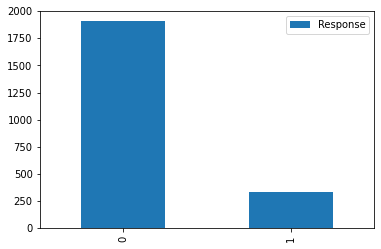

In [5]:
# Classes count
df[['Response']].apply(lambda x: x.value_counts()).plot.bar()
print('Reponse: {}, No reponse: {}'.format(
    df.Response[df.Response==1].count(), df.Response[df.Response==0].count()))

### Data Preprocessing

<AxesSubplot:ylabel='Frequency'>

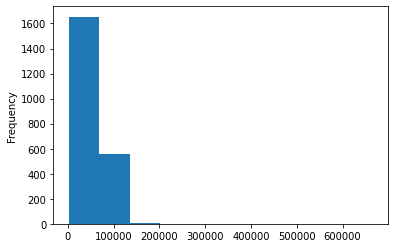

In [6]:
# check income and handle outliers
df.Income.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

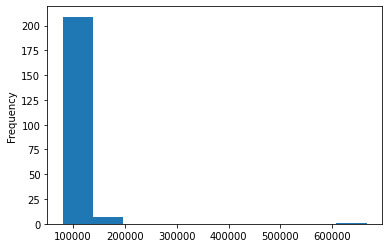

In [7]:
# look into outliers 
top = df[df["Income"] > 80000].sort_values("Income") 
top.Income.plot(kind="hist")

Income Distribution:


<AxesSubplot:ylabel='Frequency'>

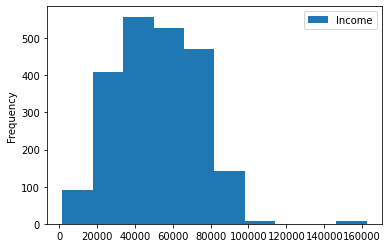

In [45]:
# drop outliers
df = df[df.Income <= 600000]
print('Income Distribution:')
df[['Income']].plot.hist()

### Feature engineering

In [9]:
# impute column of age and column of time from enrollment to now
df['age'] = date.today().year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['months_customer'] = (date.today().year - df['Dt_Customer'].dt.year) * 12 + (date.today().month - df['Dt_Customer'].dt.month)
df.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

<AxesSubplot:>

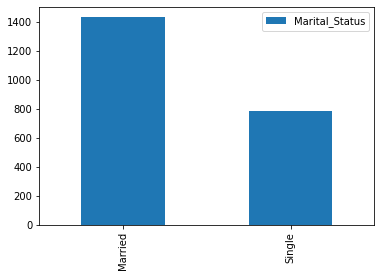

In [10]:
# handle ordinal categorical variable 'Education' and nominal categorical variable 'Marital Status'
# merge similar status 
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 'Together' or x =='Married' else 'Single')
df['Marital_Status'].value_counts()
df[['Marital_Status']].apply(lambda x: x.value_counts()).plot.bar()

Graduation    1115
Master         565
PhD            481
Basic           54
Name: Education, dtype: int64


<AxesSubplot:>

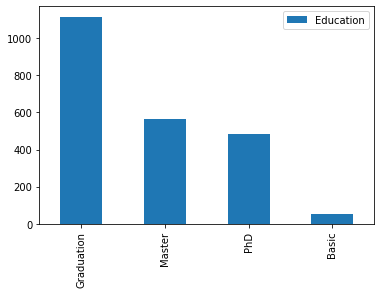

In [11]:
df['Education'] = df['Education'].apply(lambda x: 'Master' if x == '2n Cycle' else x)
print(df['Education'].value_counts())
df[['Education']].apply(lambda x: x.value_counts()).plot.bar()

<AxesSubplot:>

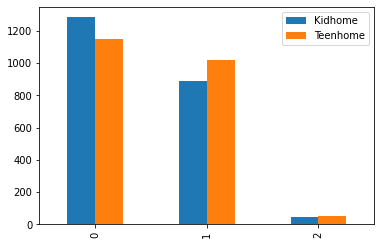

In [12]:
df[['Kidhome','Teenhome']].apply(lambda x: x.value_counts()).plot.bar()

In [13]:
# Apply scaler and encoder to features
binary_col = ['AcceptedCmp1', ' AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain']
nominal_col = ['Marital_Status']
ordinal_col = ['Education']
numeric_col = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [14]:
trans = make_column_transformer((OneHotEncoder(sparse = False),nominal_col),
                                (OrdinalEncoder(), ordinal_col),
                                (StandardScaler(),numeric_col),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['Marital_Status']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Education']),
                                ('standardscaler', StandardScaler(),
                                 ['Income', 'Kidhome', 'Teenhome', 'Recency',
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts',
                                  'MntGoldProds', 'NumDealsPurchases',
                                  'NumWebPurchases', 'NumCatalogPurchases',
                                  'NumStorePurchases', 'NumWebVisitsMonth'])])

### Models (Decision Tree vs KNN)

In [15]:
y = df['Response']
X = df.drop(['Response'],axis=1)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [17]:
print(X_train.shape, X_test.shape)

(1550, 25) (665, 25)


In [18]:
DT =DecisionTreeClassifier()
KNN = KNeighborsClassifier(n_neighbors = 7)

In [19]:
pipe_DT =make_pipeline(trans,DT)
pipe_DT

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Marital_Status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Education']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
pipe_KNN =make_pipeline(trans,KNN)
pipe_KNN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Marital_Status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Education']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [39]:
pipe_DT.fit(X_train,y_train)
pred_DT = pipe_DT.predict(X_test)
print('Decision Tree Model:')
print('Accuracy score: {}, MSE: {}'.format(round(accuracy_score(pred_DT,y_test)*100,3), round(mean_squared_error(pred_DT,y_test),3)))
print(classification_report(y_test, pred_DT))

Decision Tree Model:
Accuracy score: 81.353, MSE: 0.186
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       560
           1       0.39      0.31      0.35       105

    accuracy                           0.81       665
   macro avg       0.63      0.61      0.62       665
weighted avg       0.80      0.81      0.81       665



In [38]:
pipe_KNN.fit(X_train,y_train)
pred_KNN = pipe_KNN.predict(X_test)
print('KNN Model:')
print('Accuracy score: {}, MSE: {}'.format(round(accuracy_score(pred_KNN,y_test)*100,3), round(mean_squared_error(pred_KNN,y_test),3)))
print(classification_report(y_test, pred_KNN))

KNN Model:
Accuracy score: 84.211, MSE: 0.158
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       560
           1       0.50      0.14      0.22       105

    accuracy                           0.84       665
   macro avg       0.68      0.56      0.57       665
weighted avg       0.80      0.84      0.80       665



In [23]:
conf = confusion_matrix(y_test, pred_DT)
print(conf)

[[515  45]
 [ 71  34]]


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


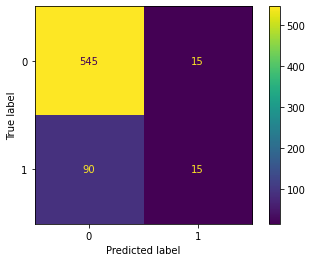

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_KNN,X_test,y_test)

In [25]:
conf = confusion_matrix(y_test, pred_KNN)
print(conf)

[[545  15]
 [ 90  15]]


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


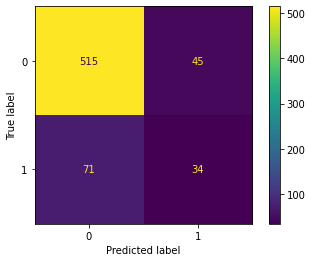

In [26]:
plot_confusion_matrix(pipe_DT,X_test,y_test)

### Balancing the training set

Reponse: 1322, No reponse: 228


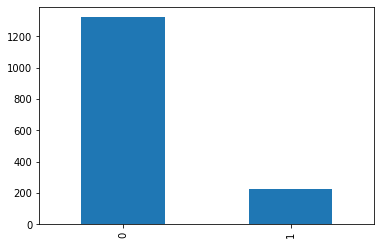

In [27]:
# Original class count
y_train.value_counts().plot.bar()
print('Reponse: {}, No reponse: {}'.format(
    y_train.value_counts()[0], y_train.value_counts()[1]))

Reponse: 1322, No reponse: 1322


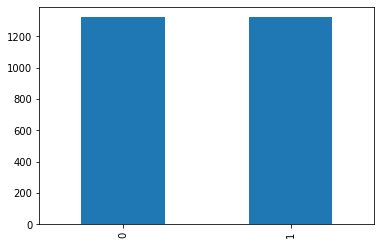

In [28]:
# oversample training data
R = RandomOverSampler()
X_train_b, y_train_b = R.fit_resample(X_train,y_train)
y_train_b.value_counts().plot.bar()
print('Reponse: {}, No reponse: {}'.format(
    y_train_b.value_counts()[0], y_train_b.value_counts()[1]))

In [29]:
from imblearn.pipeline import make_pipeline
s = SMOTE()
balance_pipe_DT = make_pipeline(trans,s,DT)
balance_pipe_DT 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Marital_Status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Education']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [30]:
balance_pipe_DT.fit(X_train_b,y_train_b)
balance_pred_DT = balance_pipe_DT.predict(X_test)
print('Decision Tree Model with balanced data:')
print('Accuracy score: {}, MSE: {}'.format(round(accuracy_score(balance_pred_DT,y_test)*100,3), round(mean_squared_error(balance_pred_DT,y_test),3)))
print(classification_report(y_test, balance_pred_DT))

Decision Tree Model with balanced data:
Accuracy score: 81.203, MSE: 0.188
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       560
           1       0.41      0.42      0.41       105

    accuracy                           0.81       665
   macro avg       0.65      0.65      0.65       665
weighted avg       0.81      0.81      0.81       665



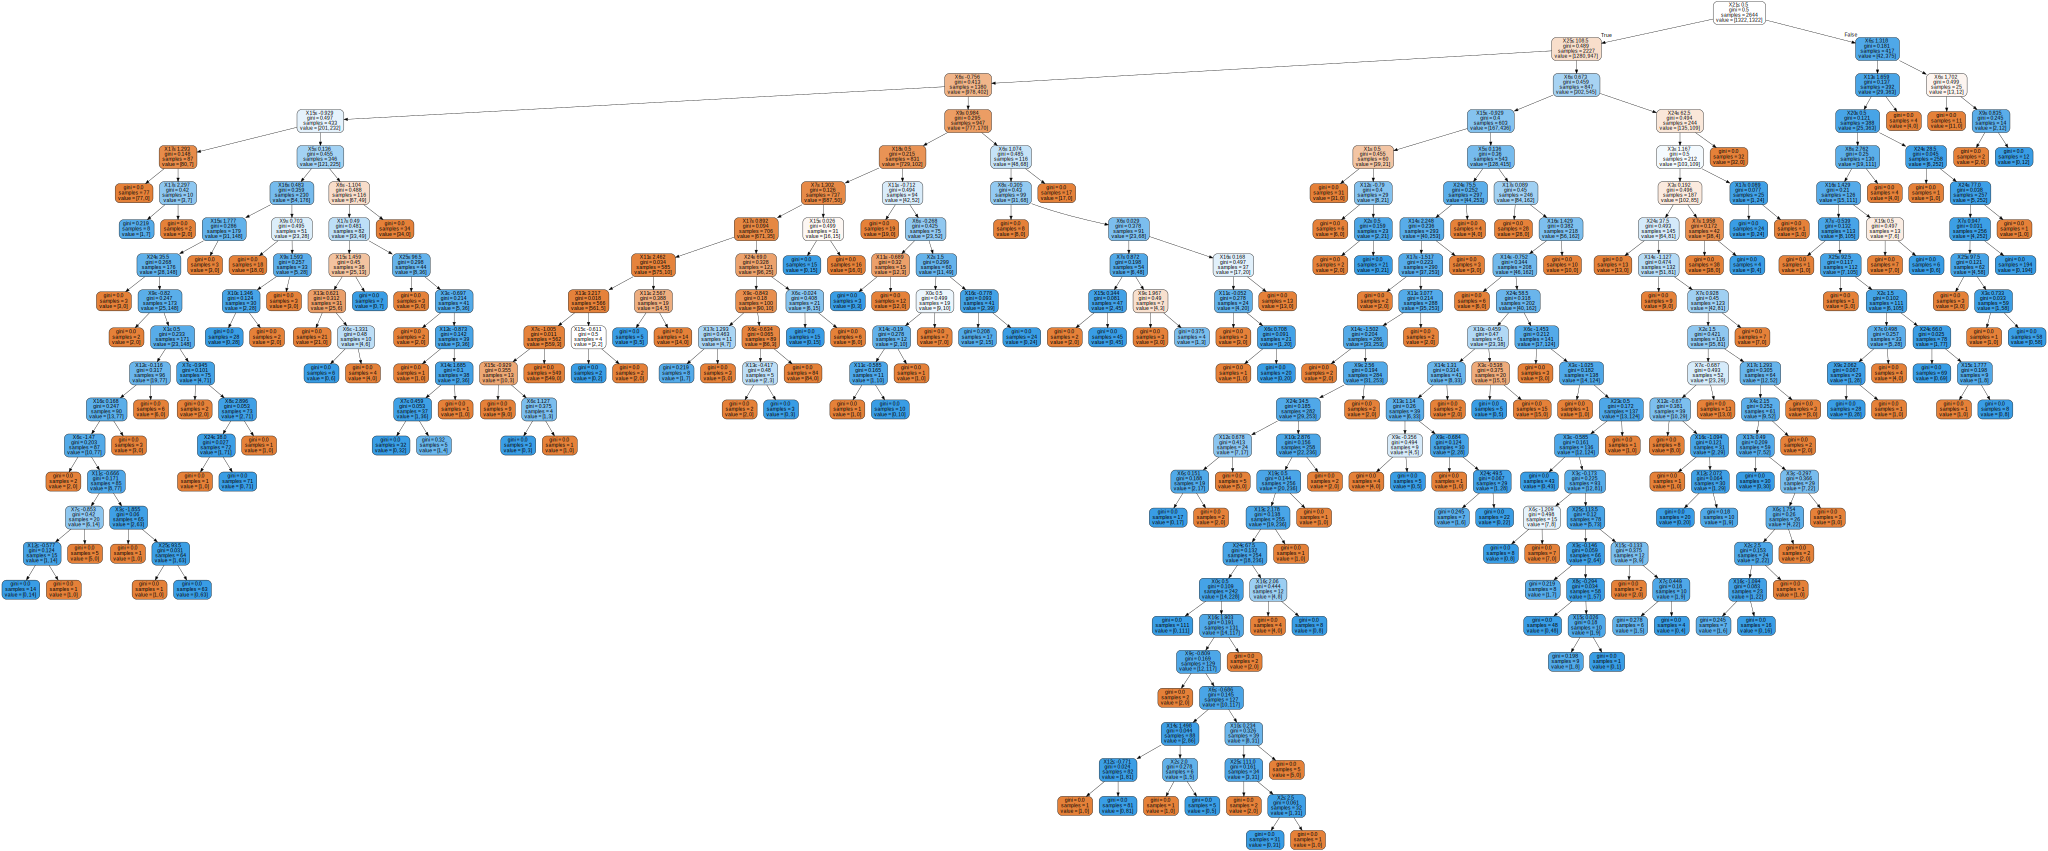

In [31]:
#tree.plot_tree(DT)
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=None,  
                     class_names=None,  
                      filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [32]:
conf = confusion_matrix(y_test, balance_pred_DT)
print(conf)

[[496  64]
 [ 61  44]]


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


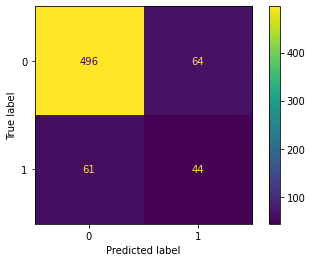

In [33]:
plot_confusion_matrix(balance_pipe_DT,X_test,y_test)

In [34]:
balance_pipe_KNN = make_pipeline(trans,s,KNN)
balance_pipe_KNN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Marital_Status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Education']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth'])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [35]:
balance_pipe_KNN.fit(X_train_b,y_train_b)
balance_pred_KNN = balance_pipe_KNN.predict(X_test)
print('KNN Model with balanced data:')
print('Accuracy score: {}, MSE: {}'.format(round(accuracy_score(balance_pred_KNN,y_test)*100,3), round(mean_squared_error(balance_pred_KNN,y_test),3)))
print(classification_report(y_test, balance_pred_KNN))

KNN Model with balanced data:
Accuracy score: 73.684, MSE: 0.263
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       560
           1       0.31      0.52      0.39       105

    accuracy                           0.74       665
   macro avg       0.60      0.65      0.61       665
weighted avg       0.80      0.74      0.76       665



In [36]:
conf = confusion_matrix(y_test, balance_pred_KNN)
print(conf)

[[435 125]
 [ 50  55]]


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


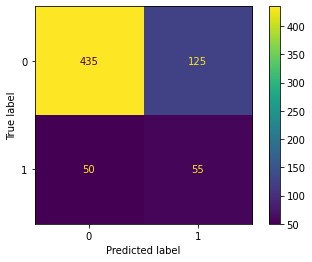

In [37]:
plot_confusion_matrix(balance_pipe_KNN,X_test,y_test)

#### Data source:
https://www.kaggle.com/rodsaldanha/arketing-campaign
#### Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>https://imbalanced-learn.org/stable/user_guide.html
<br>https://www.kaggle.com/bhavishs28/marketing-campaign
<br>https://www.kaggle.com/rodsaldanha/targeted-marketing-campaign/notebook#Balance-training-set
